# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import auc
import warnings  
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
import plotly.express as px
import plotly.io as pio


In [2]:
data=pd.read_csv(r"Dataset/Bank_Personal_Loan_Modelling(1).csv")
df=pd.DataFrame(data)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [4]:
#CCAvg is shown as object although it is numerical and we are not allowed to have / in our data set.
df["CCAvg"] = df["CCAvg"].astype(str).str.replace("/", ".", regex=False)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0


In [5]:
df["CCAvg"] = pd.to_numeric(df["CCAvg"], errors="coerce")
df["CCAvg"].dtype

dtype('float64')

In [6]:
#checking for missing values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The experience can not be minus

In [8]:
#checking for duplicate
df.duplicated().sum()

0

<span style="font-size:20px; color:darkred;">Visualization</span>  

In [9]:
df.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

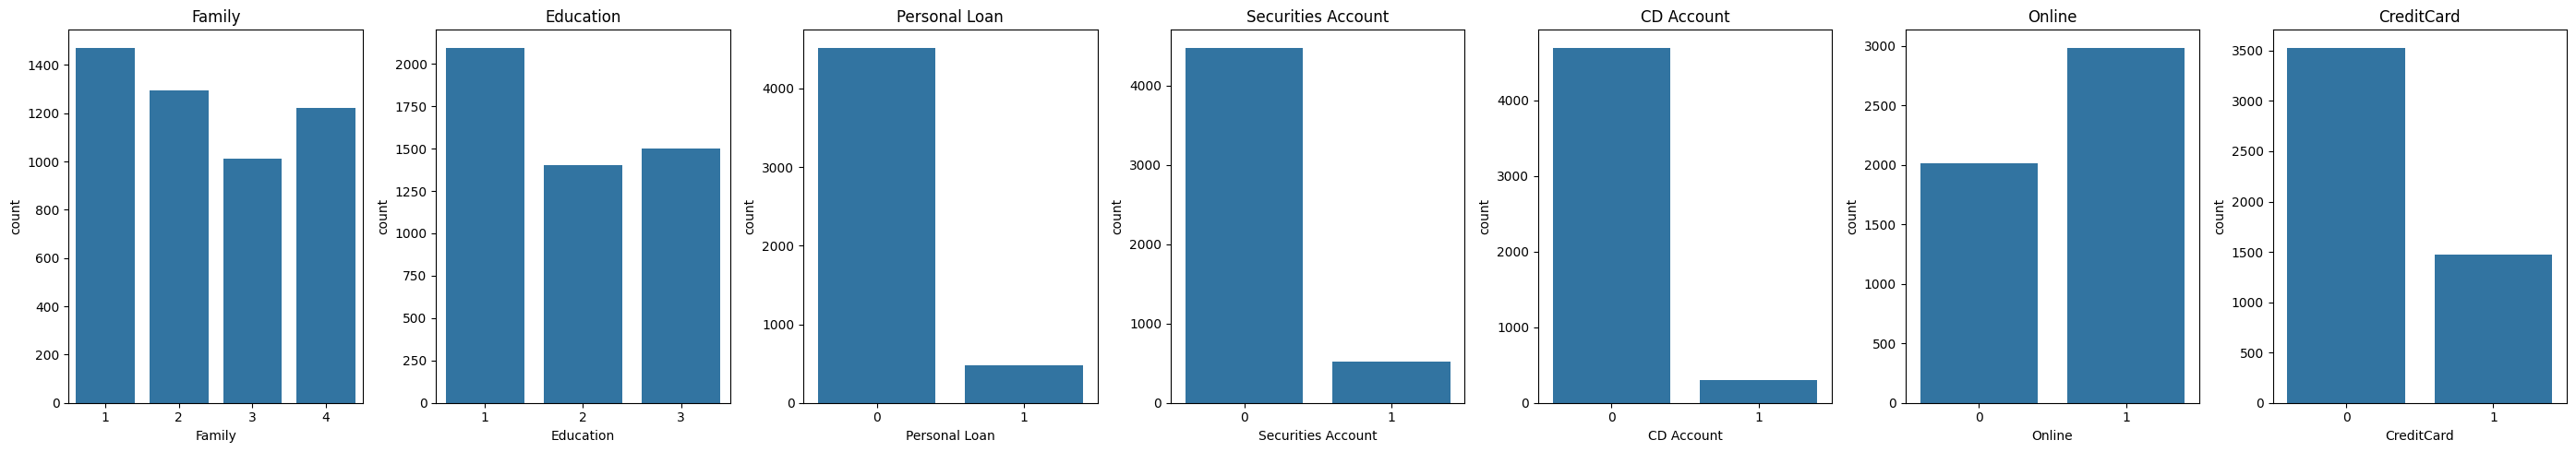

In [10]:
num_cols=['ID',	'Age',	'Experience','Income',	'ZIP Code',	'CCAvg','Mortgage']
cat_cols=['Family','Education',	'Personal Loan',	'Securities Account',	'CD Account',	'Online',	'CreditCard']
fig, axes = plt.subplots(1, len(cat_cols), figsize=(4 * len(cat_cols), 5), sharey=False)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/countplot.png", dpi=300, bbox_inches='tight')
plt.show()    

They sound ok, and within categorical columns, we can see how the data were distributed. However, in the data description, I saw negative data, which we cannot say the experience was negative. 

In [11]:
#previously we observed negative value in experience column
df1=df[df['Experience']<0]
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
# The experience was wrongly negative and needs to be positive
df.loc[df['Experience'] < 0, 'Experience'] = df.loc[df['Experience'] < 0, 'Experience'].abs()

In [13]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<span style="font-size:24px; color:blue;">Checking Outliers</span>


In [14]:
def Outliers(data, whis):
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    Q2=Q3-Q1
    Lower_bound=Q1-whis*Q1
    Upper_bound=Q3+whis*Q3
    Outliers=np.where((data<Lower_bound)|(data>Upper_bound))[0]
    return Outliers

Let's check whether we see outliers in numerical columns. 

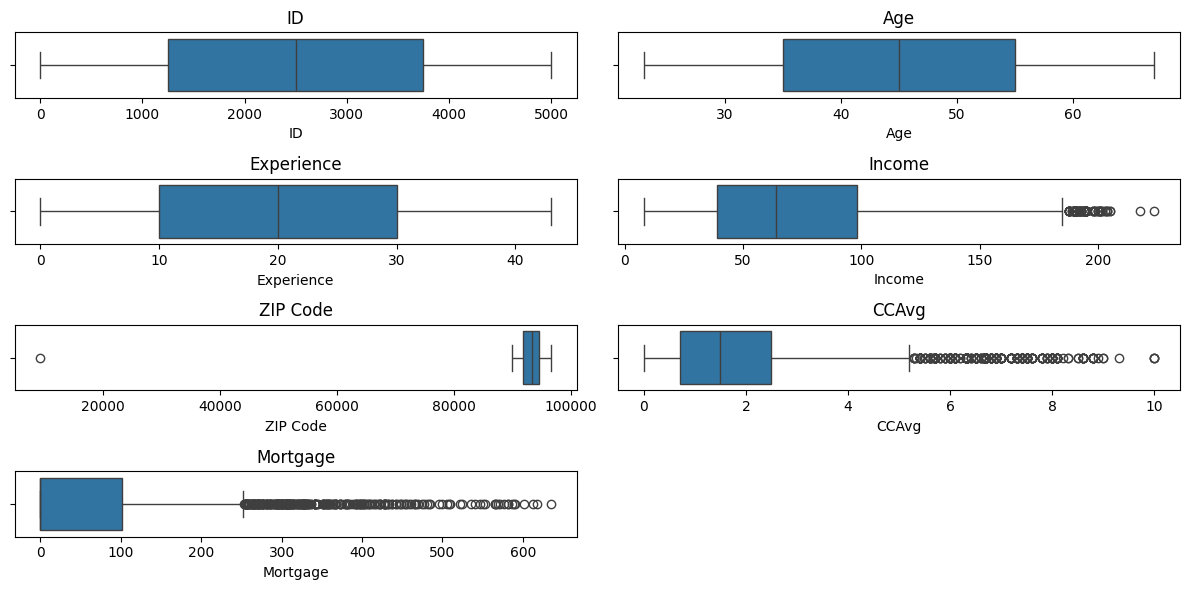

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
# Hide unused axes
for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
# Save figure 
plt.savefig("Personal Loan Modelling Images/numerical_boxplots.png",
            dpi=300, bbox_inches='tight')

plt.show()

* Only the ZIP Code has a suspicious outlier and the rest we can keep

In [17]:
outlier=df[df['ZIP Code']<20000]
outlier

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


* The rest of the features do not sound suspicious, and they look okay, but since it is only one row, I assume it would be okay if we drop this row. 

In [18]:
df1=df.drop(index=384)
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [19]:
g = sns.pairplot(df1[list(set(num_cols))])
# Save the figure
g.fig.savefig("Personal Loan Modelling Images/pairplot_numeric.png",
              dpi=300, bbox_inches='tight')
# Close the figure so it doesn't display
plt.close(g.fig)


In [20]:
# We can convert income to monthly income since now the income is based on a year, although the CCAvg is monthly and shows the average.
df2=df1.copy()
df2['Income']=round(df2['Income']/12,2)
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,4.08,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,2.83,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,0.92,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,8.33,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,3.75,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,3.33,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,1.25,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,2.00,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,4.08,90034,3,0.5,2,0,0,0,0,1,0


<span style="font-size:30px ; color:blue; font-weight:bold;">Expelory Data Analysis (EDA)</span>

In [21]:
df2.drop('ID', axis=1,inplace=True)
df2.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,91330,4,1.0,2,0,0,0,0,0,1


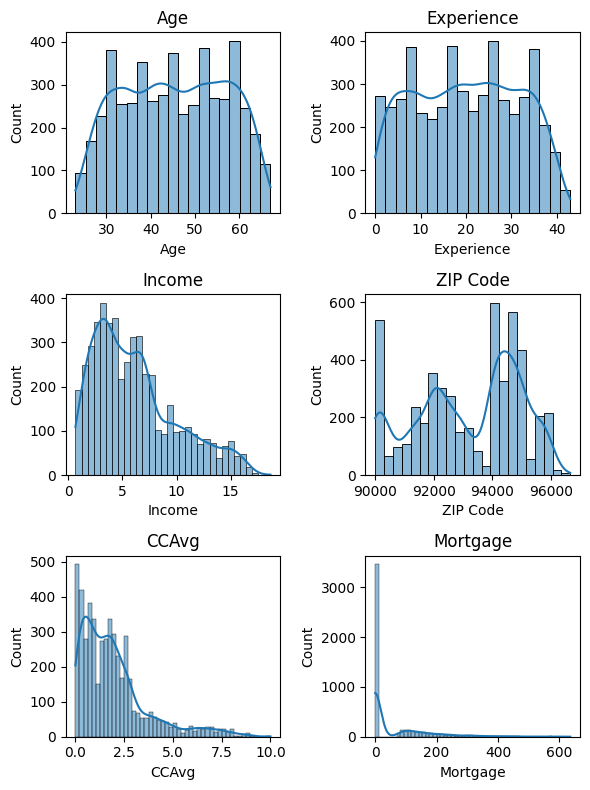

In [22]:
Num_cols=['Age',	'Experience','Income',	'ZIP Code',	'CCAvg','Mortgage']
fig,axes=plt.subplots(3,2,figsize=(6,8))
axes=axes.flatten()
for i,col in enumerate (Num_cols):
    sns.histplot(data=df2, x=col, ax=axes[i],kde=True)
    axes[i].set_title(f"{col}")
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/count_plot2.png",
            dpi=300, bbox_inches='tight')
plt.show()

* The age graph is almost evenly distributed, and the range is between 10 and 70, and the peak would be in the middle age.
* The range of experience is between 0 and 40 and uniformly distributed with a slight peak in the middle age.
* The monthly income is in the range of 0-20k and skewed toward the lower income level. meaning the majority of people have an income of around 2.5k
* We observe a variety of Zip codes, meaning the data was not collected from a specific city
* The CCAvg is distributed in the range of 0 to 10 and skewed toward lower CCAvg. Meaning the peak is in lower values
* Mortgage is tightly packed, but most people have a mortgage of 0, but it is also packed in the range of 150 to 400

In [23]:
df2[Num_cols].describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,45.337267,20.133627,6.148792,93169.275455,1.938206,56.510102
std,11.464033,11.416124,3.836112,1759.630610,1.747731,101.720837
min,23.000000,0.000000,0.670000,90005.000000,0.000000,0.000000
25%,35.000000,10.000000,3.250000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,5.330000,93437.000000,1.500000,0.000000
75%,55.000000,30.000000,8.170000,94608.000000,2.500000,101.000000
max,67.000000,43.000000,18.670000,96651.000000,10.000000,635.000000


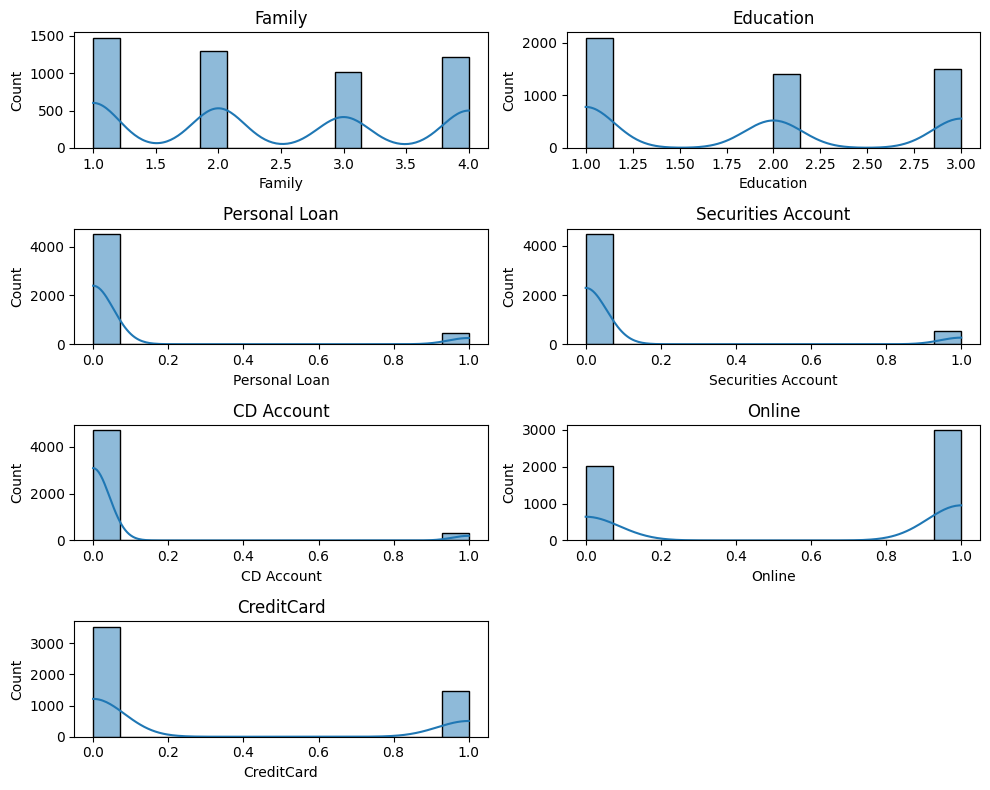

In [25]:
fig,axes=plt.subplots(4,2,figsize=(10,8))
axes=axes.flatten()
for i,col in enumerate (cat_cols):
    sns.histplot(data=df2, x=col, ax=axes[i],kde=True)
    axes[i].set_title(f"{col}")
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/categorical_cols.png",
            dpi=300, bbox_inches='tight')
plt.show()

The count of family size with 1 member has the highest count compared to 2, 3, and 4 members. We can also say the family size of 3 has the lowest count.
* Most people are undergraduates.
*  Most people do not have a personal loan as well as a securities account.
*  The majority of people do not have a CD account.
*  Most people use an online account. 
*  Most people do not have a credit card 

In [26]:
df2[cat_cols].describe()

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2.396079,1.880776,0.096019,0.104421,0.060412,0.596719,0.293859
std,1.147554,0.839804,0.294647,0.305836,0.238273,0.490605,0.455574
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


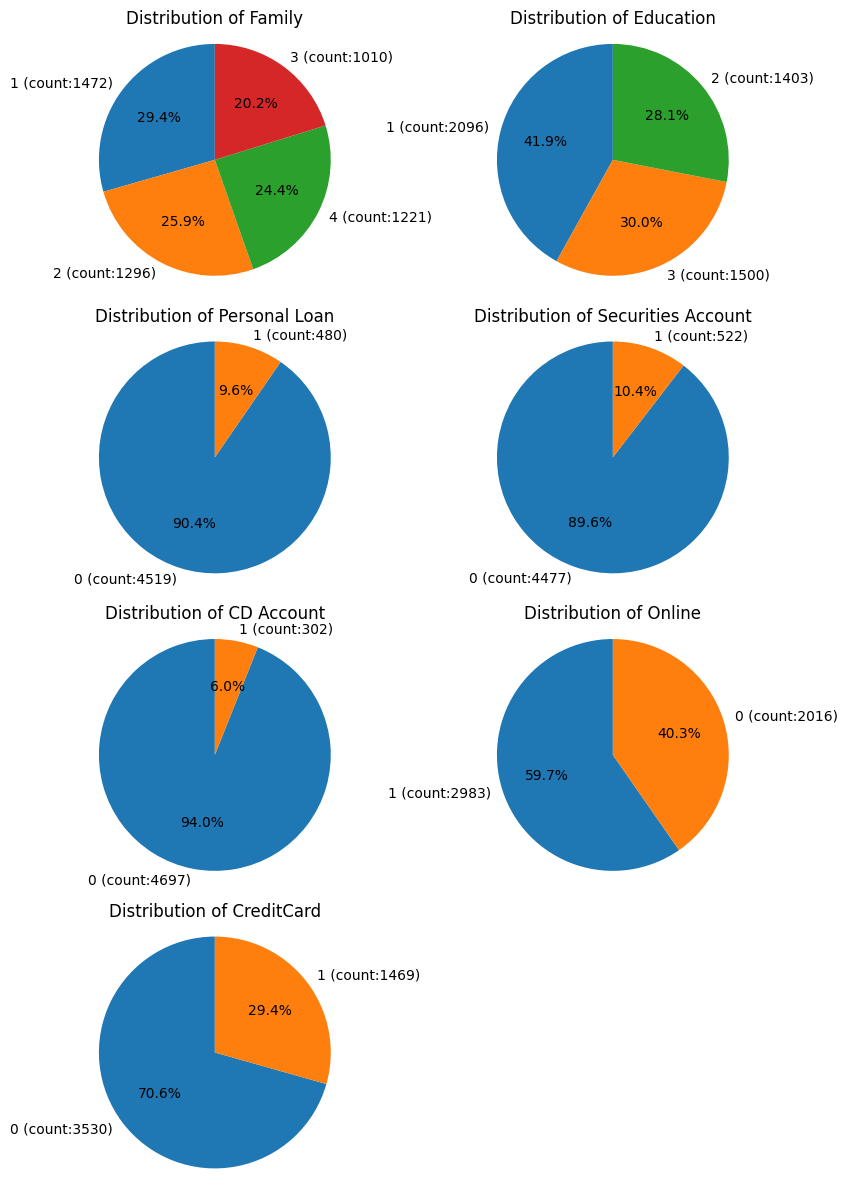

In [27]:
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols  # Round up
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    counts = df2[col].value_counts()
    labels = [f"{category} (count:{count})" for category, count in zip(counts.index, counts.values)]

    axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].axis('equal') 

# extra objobject 
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/Distribution.png",
            dpi=300, bbox_inches='tight')
plt.show()

The pie charts show the count and percentage of categorical features and align with the previous explanation.

If we consider personal Loan, we need to have comparison of different features based on personal loan

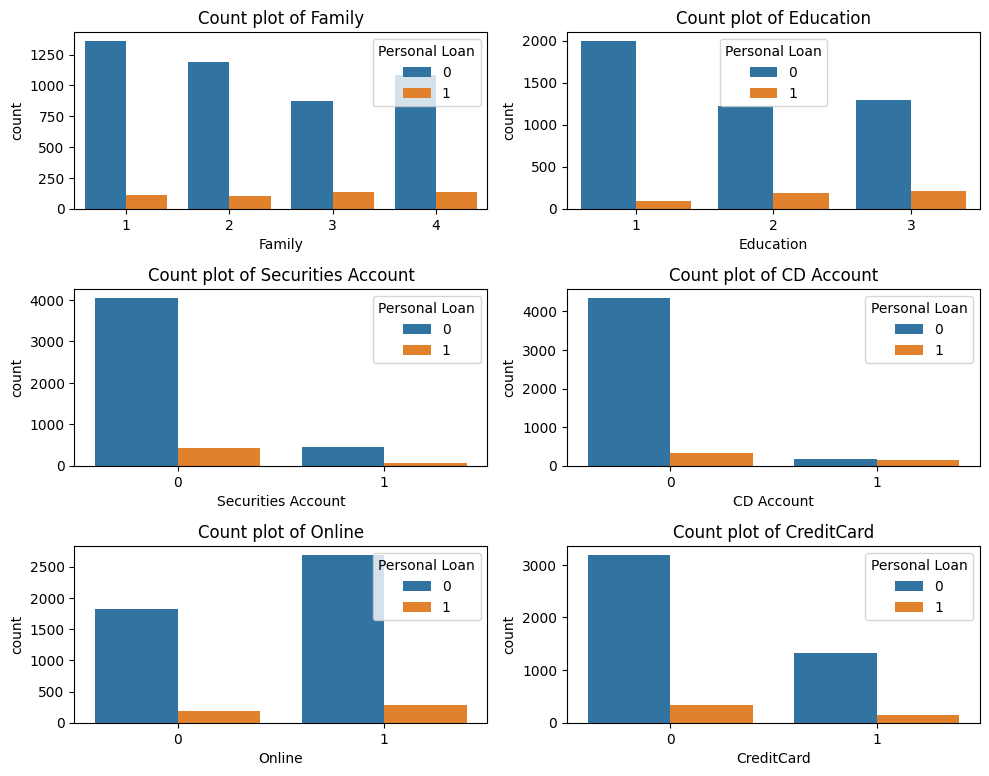

In [28]:
cat_cols_2=['Family','Education',	'Securities Account',	'CD Account',	'Online',	'CreditCard']
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flat 
for i, col in enumerate(cat_cols_2):
    ax = axes[i]
    sns.countplot(data=df2, x=col, hue='Personal Loan', ax=ax)
    ax.set_title(f"Count plot of {col}")
# Remove unused axes
for j in range(len(cat_cols_2), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/countplot_cat_calumns.png",
            dpi=300, bbox_inches='tight')
plt.show()

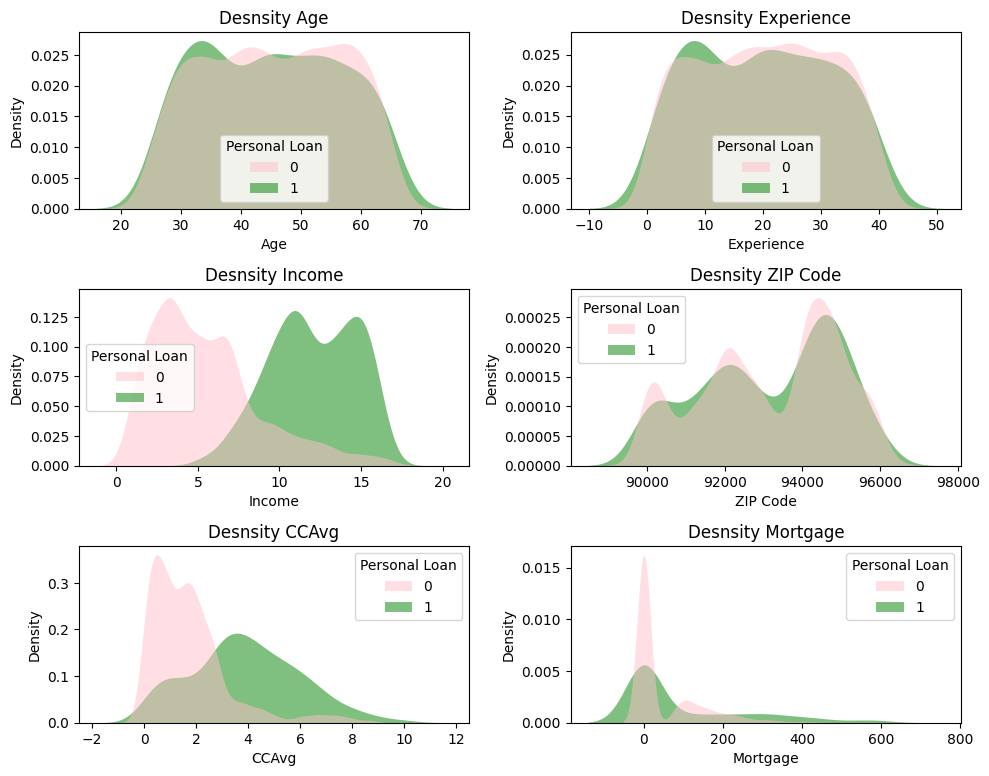

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flat 
for i, col in enumerate(Num_cols):
    ax = axes[i]
    sns.kdeplot(data=df2, x=col, hue='Personal Loan', ax=ax, fill=True, common_norm=False, palette=sns.set_palette(['Pink','Green']), alpha=.5, linewidth=0,)
    ax.set_title(f"Desnsity {col}")
# Remove unused axes
for j in range(len(Num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/KDE.png",
            dpi=300, bbox_inches='tight')
plt.show()

for people around the age of 30 the personal loan is accepted and for older people around age 60, the personal loan has not been accepted. But the differences are not significant. 
* With a lower income, the personal loan has not been accepted; in contrast, for a higher income, the chance of acceptance is much higher.
* ZIP code also has an influence on personal loans, since the location of your place is important and may show your income or mortgage. 
* CCAvg in a lower value causes not receiving a personal loan. 

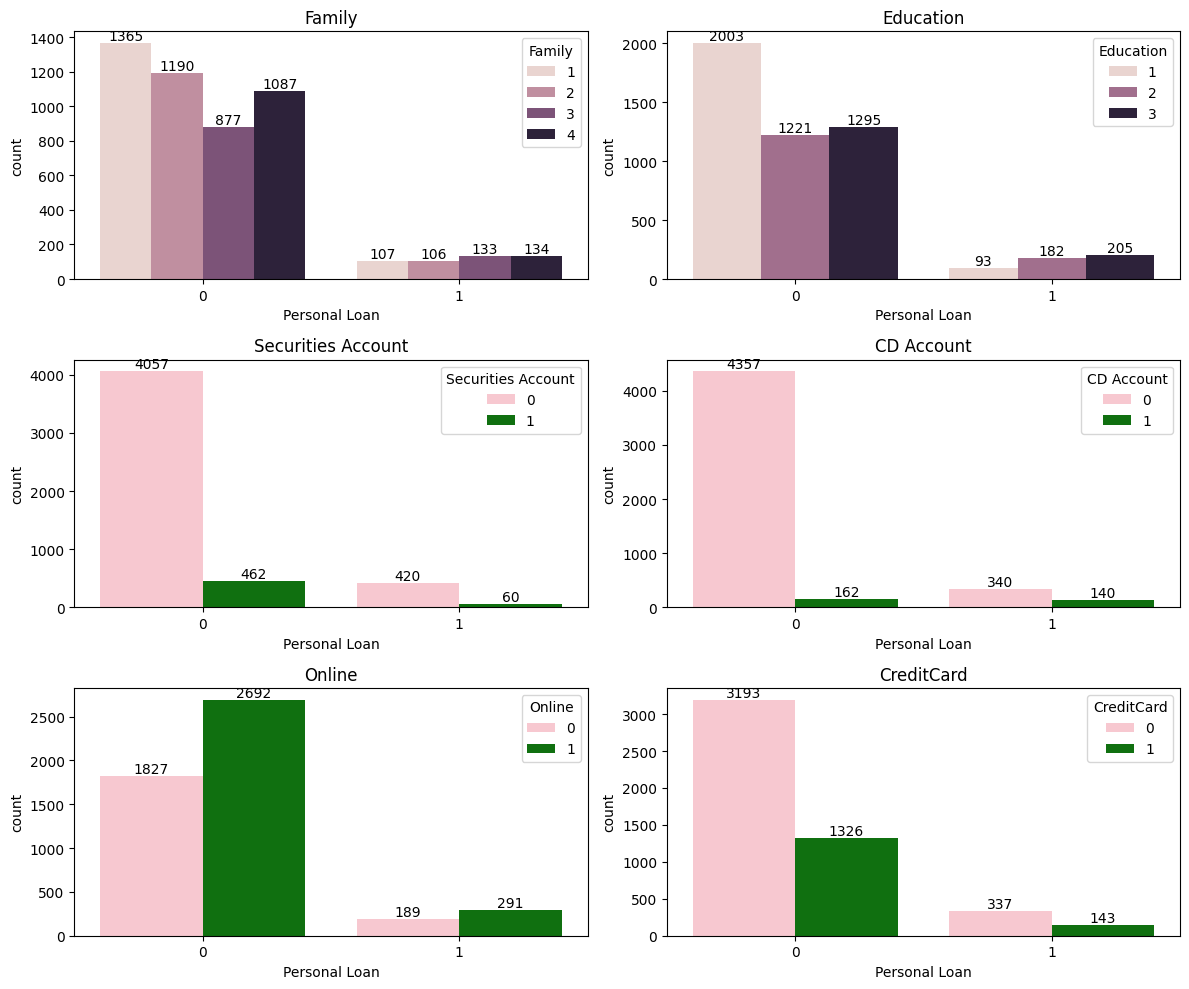

In [30]:
cat_cols_2 =['Family','Education',	'Securities Account',	'CD Account',	'Online',	'CreditCard']
fig,axes=plt.subplots(3,2,figsize=(12,10))
axes=axes.flatten()
for i,col in enumerate (cat_cols_2):
    ax=sns.countplot(data=df2, x='Personal Loan' ,hue=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    for container in ax.containers:
        ax.bar_label(container) 
plt.savefig("Personal Loan Modelling Images/countplot_cat_cals_2.png",
            dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

    * Although the data set has the majority of family size 1 but apparently the personal loan in this group is the lowest.
    * Graduated people get personal loans more than undergraduates
    * When people do not have a securities account, they possibly do not have a personal loan. this trend is also shown for CD Account
    * People who do not use online banking a personal loan is more among them 
    * When people do not have a credit card, the chance of getting a loan decreases.

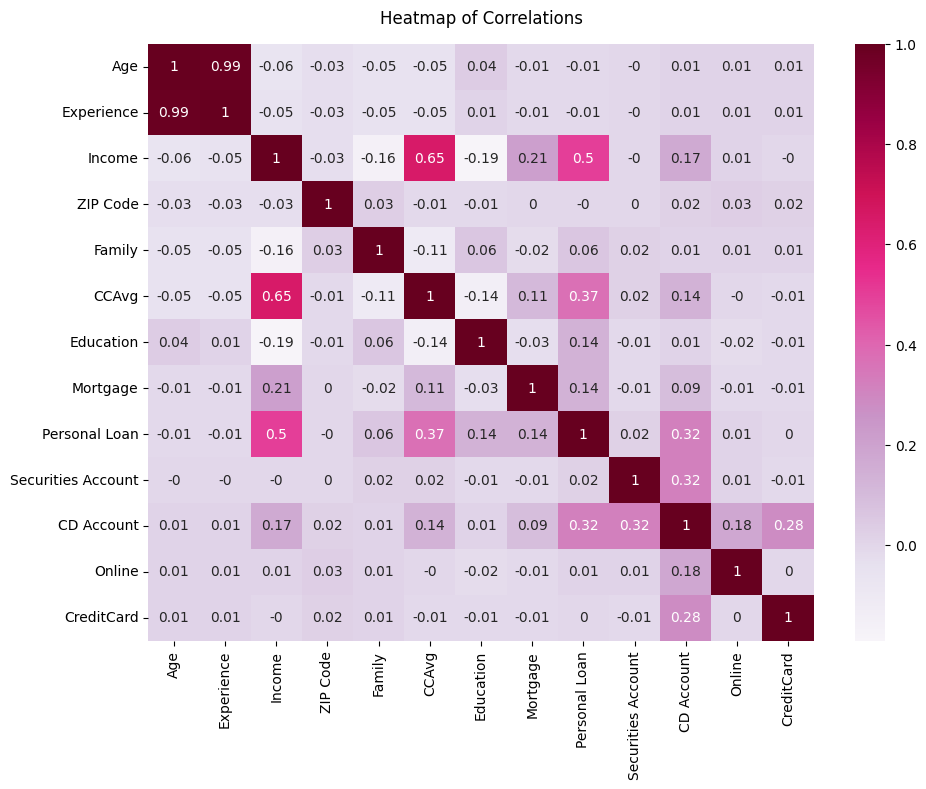

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df2.corr(),2), cmap='PuRd', annot=True)
plt.title('Heatmap of Correlations', y=1.02)
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/Heatmap.png",
            dpi=300, bbox_inches='tight')
plt.show()

* According to the heatmap, Personal Loan has the highest correlation with Income, CCAvg and CD Account respectively.
* Age and experience have a completely linear relationship with each other.

In [32]:
plt.figure(figsize=(8,5))
sns.pairplot(df2[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']],hue='Personal Loan')
plt.tight_layout()
plt.savefig("Personal Loan Modelling Images/PairPlot2.png",
            dpi=300, bbox_inches='tight')
plt.close()

<Figure size 800x500 with 0 Axes>

<span style="font-size: 30px; color: magenta;font-weight:bold; ">Modelling </span >

<span style="font-size: 20px; color: black; ">The next part of this notebook focuses on model comparison. I train and evaluate Logistic Regression, KNN, and Naive Bayes classifiers to determine which algorithm performs best for personal loan prediction. Based on the evaluation results, the strongest model will be chosen and carried forward as the final model for interpretation and deployment. </span >

In [33]:
df3=df2.copy()

In [35]:
x=df3[['Age',	'Experience',	'Income',	'ZIP Code',	'Family',	'CCAvg',	'Education',	'Mortgage',	'Securities Account',	'CD Account',	'Online'	,'CreditCard']]
y=df3['Personal Loan']
x.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,91107,4,1.6,1,0,1,0,0,0
1,45,19,2.83,90089,3,1.5,1,0,1,0,0,0
2,39,15,0.92,94720,1,1.0,1,0,0,0,0,0
3,35,9,8.33,94112,1,2.7,2,0,0,0,0,0
4,35,8,3.75,91330,4,1.0,2,0,0,0,0,1


* Normalization

In [38]:
y = df3['Personal Loan']
x = df3.drop('Personal Loan', axis=1)
numeric_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
binary_cols = ['Securities Account', 'CD Account', 'Online', 'CreditCard'] #only 0,1
ordinal_cols = ['Education']  # 1 = Undergrad, 2 = Graduate, 3 = Advanced
#numerical columns normalization
scaler = MinMaxScaler()
x_numeric = pd.DataFrame(scaler.fit_transform(x[numeric_cols]), columns=numeric_cols)
# categorical remain as it is
x_binary = x[binary_cols].reset_index(drop=True)
x_ordinal = x[ordinal_cols].reset_index(drop=True)
# I believe location matters in personal loans since the place where you live can have a valid impact, and of course, the living place also shows possession and 
# We applied target encoding, which captures the relation between categorical and target
zip_mean = df3.groupby('ZIP Code')['Personal Loan'].mean()
x_zip = df3['ZIP Code'].map(zip_mean).rename('ZIP_Code_encoded').reset_index(drop=True)
# all columns together
x_final = pd.concat([x_numeric, x_binary, x_ordinal, x_zip], axis=1)
x_final.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education,ZIP_Code_encoded
0,0.045455,0.023256,0.189444,1.000000,0.16,0.0,1,0,0,0,1,0.120000
1,0.500000,0.441860,0.120000,0.666667,0.15,0.0,1,0,0,0,1,0.173913
2,0.363636,0.348837,0.013889,0.000000,0.10,0.0,0,0,0,0,1,0.112426
3,0.272727,0.209302,0.425556,0.000000,0.27,0.0,0,0,0,0,2,0.000000
4,0.272727,0.186047,0.171111,1.000000,0.10,0.0,0,0,0,1,2,0.065217


In [39]:
print(x_final.shape)  
print(y.shape)        

(4999, 12)
(4999,)


<span style="font-size:20px; color: magenta;font-weight: bold">Logistic Regression</span>

In [40]:
#since we want to try different test-size we can write a loop for having scores for each of the test size
test_sizes = [0.1, 0.2, 0.3, 0.4]
results = []

for size in test_sizes:
    print(f"\n Test Size: {size}")
    x_train, x_test, y_train, y_test = train_test_split(
        x_final, y, test_size=size, random_state=0
    )

    # Model training
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    loss = log_loss(y_test, y_proba)

    # Scores
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # -------------------------
    # Confusion Matrix Plot
    # -------------------------
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Reds')
    plt.title(f"Confusion Matrix (Test Size={size})")

    # Save confusion matrix
    plt.savefig(
        f"Personal Loan Modelling Images/confusion_matrix_{size}.png",
        dpi=300, bbox_inches='tight'
    )
    plt.close()   # Close so it doesn't overlap with next plot

    # -------------------------
    # ROC Curve Plot
    # -------------------------
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Test Size={size})")
    plt.legend()
    plt.grid(True)

    # Save ROC curve
    plt.savefig(
        f"Personal Loan Modelling Images/roc_curve_{size}.png",
        dpi=300, bbox_inches='tight'
    )
    plt.close()

    # Store results
    results.append({
        'Test Size': size,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': roc_auc,
        'Log Loss': loss
    })

# Results table
score_df = pd.DataFrame(results)
print(score_df)


 Test Size: 0.1

 Test Size: 0.2

 Test Size: 0.3

 Test Size: 0.4
   Test Size  Accuracy  Precision    Recall  F1 Score       AUC  Log Loss
0        0.1  0.942000   0.916667  0.448980  0.602740  0.946061  0.151355
1        0.2  0.952000   0.934426  0.564356  0.703704  0.969581  0.123236
2        0.3  0.949333   0.898876  0.544218  0.677966  0.966157  0.127225
3        0.4  0.953000   0.888000  0.581152  0.702532  0.969573  0.121770


The table compares the performance of a logistic regression model across different test sizes.

* Accuracy: overall percentage of correct prediction
* Precision: How many predicted positives were actually positive
* Recall: How many actual positives were correctly predicted
* F1 score: Balance between precision and recall
* AUC: How well the model separates the two classes

* Accuracy is high across all test sizes, and the highest is observed in test size 0.4.
* Precision is the highest at test size=0.2
* Recall has higher percentage in larger test size and reaches the highest value at test size=0.4
* F1 score, which balances precision and recall, is highest at 0.2 and 0.4
* AUC, which measures class separation, is strongest at 0.2 and 0.4

--> overall the test size=0.2 has the best performance


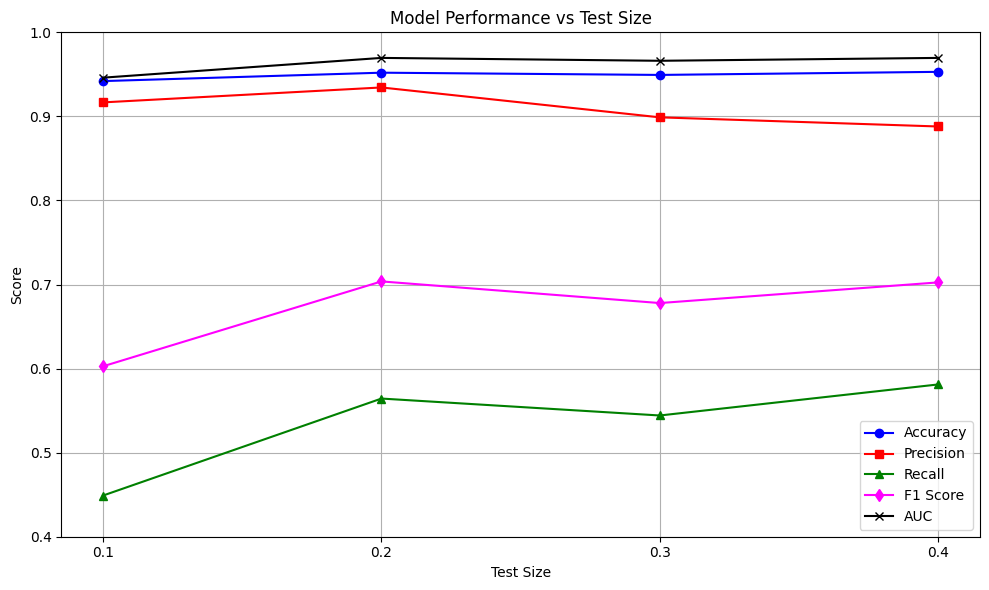

In [41]:
plt.figure(figsize=(10, 6))
# Plot each metric
plt.plot(score_df['Test Size'], score_df['Accuracy'], marker='o', label='Accuracy',color='blue')
plt.plot(score_df['Test Size'], score_df['Precision'], marker='s', label='Precision',color='red')
plt.plot(score_df['Test Size'], score_df['Recall'], marker='^', label='Recall',color='green')
plt.plot(score_df['Test Size'], score_df['F1 Score'], marker='d', label='F1 Score',color='magenta')
plt.plot(score_df['Test Size'], score_df['AUC'], marker='x', label='AUC',color='black')
plt.title("Model Performance vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Score")
plt.xticks(score_df['Test Size'])
plt.ylim(0.4, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Personal Loan Modelling Images/Model Performance vs Test Size.png",dpi=300, bbox_inches='tight')
plt.show()

In [42]:
coef_df = pd.DataFrame({
    'Feature': x_final.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_df)

               Feature  Coefficient   Odds Ratio
2               Income     7.923993  2762.780932
11    ZIP_Code_encoded     4.794442   120.836978
7           CD Account     2.815416    16.700128
4                CCAvg     1.996469     7.363012
10           Education     1.340091     3.819390
3               Family     1.152563     3.166298
5             Mortgage     0.468768     1.598024
1           Experience     0.192640     1.212446
0                  Age     0.179186     1.196244
8               Online    -0.488609     0.613479
6   Securities Account    -0.598592     0.549585
9           CreditCard    -0.821254     0.439880


This table summarizes how each feature influences the likelihood of personal loan approval according to the logistic regression model. The coefficient reflects the feature’s effect on the log-odds of approval, while the odds ratio translates that effect into a more interpretable scale.


Income has the strongest positive impact: every unit increase in income multiplies the odds of loan approval by over 2700×, indicating a dominant role in decision-making.

ZIP_Code_encoded also shows a strong effect, suggesting that certain ZIP codes are highly associated with loan approval , this may reflect regional socioeconomic patterns.

CD Account, CCAvg (credit card average spending), and Education all significantly increase the odds of approval, showing that financial engagement and education level are strong predictors.

Family, Mortgage, Experience, and Age have moderate positive effects

Online banking, Securities Account, and CreditCard have odds ratios below 1, meaning they decrease the likelihood of loan approval , possibly due to risk indicators or existing financial commitments


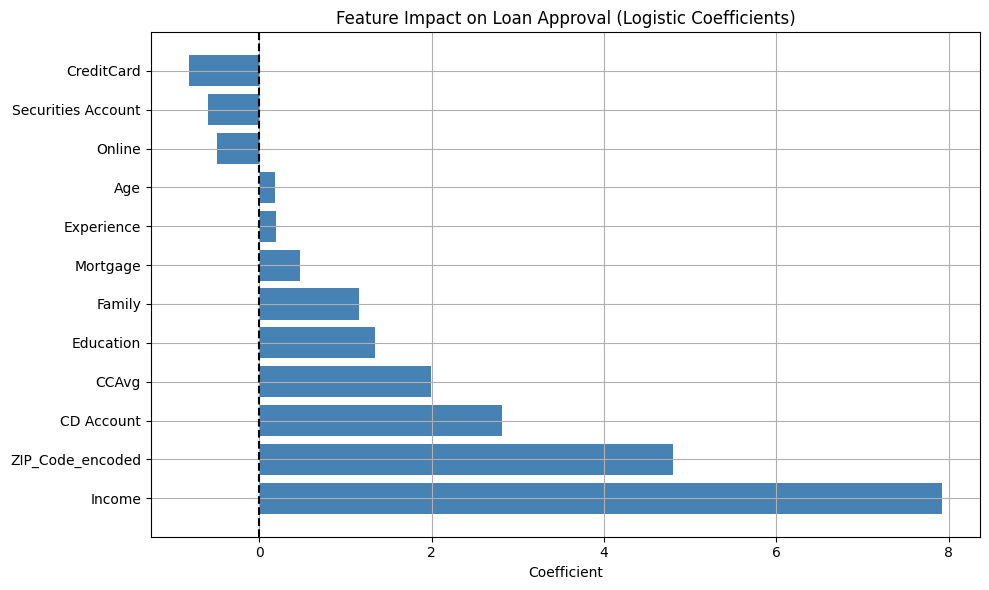

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.axvline(0, color='black', linestyle='--')  # reference line at zero
plt.xlabel("Coefficient")
plt.title("Feature Impact on Loan Approval (Logistic Coefficients)")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"Personal Loan Modelling Images/Feature Impact on Loan Approval(LR).png",dpi=300, bbox_inches='tight')
plt.show()

* cross validation

In [44]:
df4=df3.copy()
y = df4['Personal Loan']
x = df4.drop('Personal Loan', axis=1)
numeric_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
binary_cols = ['Securities Account', 'CD Account', 'Online', 'CreditCard'] #only 0,1
ordinal_cols = ['Education']  # 1 = Undergrad, 2 = Graduate, 3 = Advanced
#numerical columns normalization
scaler = MinMaxScaler()
x_numeric = pd.DataFrame(scaler.fit_transform(x[numeric_cols]), columns=numeric_cols)
# categorical remain as it is
x_binary = x[binary_cols].reset_index(drop=True)
x_ordinal = x[ordinal_cols].reset_index(drop=True)
# I believe location matters in personal loans since the place where you live can have a valid impact, and of course, the living place also shows possession and 
# We applied target encoding, which captures the relation between categorical and target
zip_mean = df3.groupby('ZIP Code')['Personal Loan'].mean()
x_zip = df3['ZIP Code'].map(zip_mean).rename('ZIP_Code_encoded').reset_index(drop=True)
# all columns together
x_final = pd.concat([x_numeric, x_binary, x_ordinal, x_zip], axis=1)

In [45]:
print(x_final.shape)
print(y.shape)

(4999, 12)
(4999,)


In [46]:
# Cross validation
model = LogisticRegression(max_iter=1000, solver='liblinear')
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)
fold_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(x_final, y)):
    x_train, x_test = x_final.iloc[train_idx], x_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    # -------------------------
    # ROC Curve
    # -------------------------
    plt.figure(figsize=(8, 5))
    RocCurveDisplay.from_predictions(
        y_test, y_proba, name=f"Fold {fold+1}", ax=plt.gca()
    )
    plt.title(f"ROC Curve - Fold {fold+1}")

    # Save ROC curve
    plt.savefig(
        f"Personal Loan Modelling Images/roc_curve_fold_{fold+1}.png",
        dpi=300, bbox_inches='tight'
    )
    plt.close()

    # -------------------------
    # Confusion Matrix
    # -------------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Fold {fold+1}")

    # Save confusion matrix
    plt.savefig(
        f"Personal Loan Modelling Images/confusion_matrix_fold_{fold+1}.png",
        dpi=300, bbox_inches='tight'
    )
    plt.close()

    # -------------------------
    # Metrics
    # -------------------------
    scores = {
        'Fold': fold + 1,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }
    fold_scores.append(scores)

# Summary table
score_df = pd.DataFrame(fold_scores)
print(score_df)
print("\nMean F1 Score:", score_df['F1'].mean())

# -------------------------
# F1 Score Plot
# -------------------------
plt.figure(figsize=(8, 4))
plt.plot(score_df['Fold'], score_df['F1'], marker='o', label='F1 Score')
plt.axhline(score_df['F1'].mean(), color='red', linestyle='--', label='Mean F1')
plt.title("F1 Score Across Folds (Logistic Regression)")
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save F1 score plot
plt.savefig(
    "Personal Loan Modelling Images/f1_scores_across_folds.png",
    dpi=300, bbox_inches='tight'
)
plt.close()

   Fold  Accuracy  Precision  Recall        F1       AUC
0     1  0.962830   0.888889  0.7000  0.783217  0.977172
1     2  0.956783   0.907407  0.6125  0.731343  0.979117
2     3  0.955582   0.890909  0.6125  0.725926  0.959130
3     4  0.944778   0.869565  0.5000  0.634921  0.960325
4     5  0.959184   0.910714  0.6375  0.750000  0.964791
5     6  0.951981   0.870370  0.5875  0.701493  0.972958

Mean F1 Score: 0.7211498608264778


<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

* Fold 1 has the highest accuracy and F1 score

<span style="font-size:20px; color: magenta;font-weight: bold">KNN</span>

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    x_final, y, test_size=0.2, stratify=y, random_state=42
)

# KNN from K=1 to K=21
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, knn.predict(x_train))
    test_acc = accuracy_score(y_test, knn.predict(x_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# -------------------------
# Accuracy vs k plot
# -------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.title("KNN Accuracy vs k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save accuracy plot
plt.savefig(
    "Personal Loan Modelling Images/knn_accuracy_vs_k.png",
    dpi=300, bbox_inches='tight'
)
plt.close()

# -------------------------
# Best k
# -------------------------
best_k = k_values[test_accuracies.index(max(test_accuracies))]
print(f"Best k: {best_k} with Test Accuracy: {max(test_accuracies):.4f}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
y_proba = best_knn.predict_proba(x_test)[:, 1]

# -------------------------
# Confusion matrix
# -------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title(f"Confusion Matrix (k={best_k})")

plt.savefig(
    f"Personal Loan Modelling Images/knn_confusion_matrix_k_{best_k}.png",
    dpi=300, bbox_inches='tight'
)
plt.close()

# -------------------------
# ROC curve
# -------------------------
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title(f"ROC Curve (k={best_k})")
plt.grid(True)
plt.tight_layout()

plt.savefig(
    f"Personal Loan Modelling Images/knn_roc_curve_k_{best_k}.png",
    dpi=300, bbox_inches='tight'
)
plt.close()

# -------------------------
# Summary table
# -------------------------
summary_df = pd.DataFrame({
    'k': k_values,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})
print(summary_df)

Best k: 3 with Test Accuracy: 0.9650
     k  Train Accuracy  Test Accuracy
0    1        1.000000          0.958
1    2        0.968492          0.953
2    3        0.975494          0.965
3    4        0.962741          0.950
4    5        0.965991          0.953
5    6        0.956489          0.944
6    7        0.960740          0.949
7    8        0.952488          0.945
8    9        0.955239          0.948
9   10        0.949987          0.944
10  11        0.952238          0.947
11  12        0.945236          0.941
12  13        0.946987          0.942
13  14        0.941985          0.938
14  15        0.944236          0.938
15  16        0.941735          0.933
16  17        0.941735          0.935
17  18        0.939485          0.929
18  19        0.941235          0.933
19  20        0.936234          0.925


<Figure size 500x400 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [48]:
# Visualization of F1 and AUC
k_values = range(1, 21)
f1_scores = []
auc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_proba = knn.predict_proba(x_test)[:, 1]

    f1_scores.append(f1_score(y_test, y_pred))
    auc_scores.append(roc_auc_score(y_test, y_proba))

# -------------------------
# F1 score vs k
# -------------------------
plt.figure(figsize=(8, 4))
plt.plot(k_values, f1_scores, marker='o', label='F1 Score')
plt.title("F1 Score vs k (KNN)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score")
plt.grid(True)
plt.tight_layout()

# Save F1 plot
plt.savefig(
    "Personal Loan Modelling Images/knn_f1_score_vs_k.png",
    dpi=300, bbox_inches='tight'
)
plt.close()

# -------------------------
# AUC vs k
# -------------------------
plt.figure(figsize=(8, 4))
plt.plot(k_values, auc_scores, marker='s', color='green', label='AUC')
plt.title("AUC vs k (KNN)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("AUC")
plt.grid(True)
plt.tight_layout()

# Save AUC plot
plt.savefig(
    "Personal Loan Modelling Images/knn_auc_vs_k.png",
    dpi=300, bbox_inches='tight'
)
plt.close()

# -------------------------
# Summary table
# -------------------------
summary_df = pd.DataFrame({
    'k': k_values,
    'F1 Score': f1_scores,
    'AUC': auc_scores
})
print(summary_df)

     k  F1 Score       AUC
0    1  0.764045  0.846423
1    2  0.688742  0.905023
2    3  0.790419  0.925574
3    4  0.652778  0.934625
4    5  0.692810  0.933594
5    6  0.594203  0.932683
6    7  0.648276  0.941320
7    8  0.604317  0.946188
8    9  0.638889  0.955470
9   10  0.600000  0.954398
10  11  0.634483  0.952376
11  12  0.575540  0.951621
12  13  0.591549  0.955579
13  14  0.550725  0.954905
14  15  0.563380  0.965420
15  16  0.510949  0.965362
16  17  0.532374  0.965466
17  18  0.466165  0.969067
18  19  0.510949  0.967194
19  20  0.418605  0.967206


since the K=3 has better F1 score and accuracy in comparison to others, K=3 is the best for this model and also since the accuracy in comparison to Logistic regression is higher between these two models KNN for this dataset work better. Now let's compare to naive bayes and after finding the best we include graphs.

Test Accuracy (k=3): 0.9250


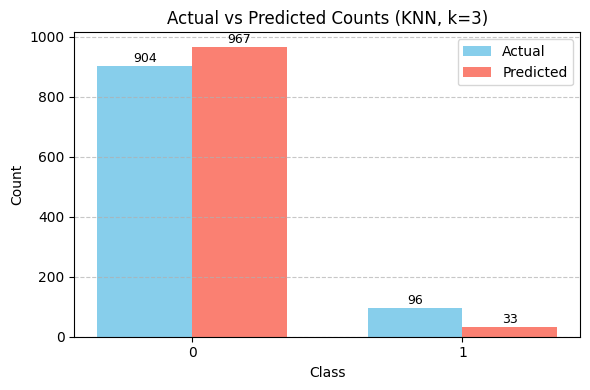

In [49]:
#Accuracy 
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (k=3): {acc:.4f}")

# Count of  actual and predicted values
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()
# Generating data fareme
count_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).fillna(0)
# Bar plot with count
bar_width = 0.35
index = np.arange(len(count_df))
plt.figure(figsize=(6, 4))
bars1 = plt.bar(index, count_df['Actual'], bar_width, label='Actual', color='skyblue')
bars2 = plt.bar(index + bar_width, count_df['Predicted'], bar_width, label='Predicted', color='salmon')
# Count label
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted Counts (KNN, k=3)')
plt.xticks(index + bar_width / 2, count_df.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(
    "Personal Loan Modelling Images/Actual vs Predicted (KNN,K=3).png",
    dpi=300, bbox_inches='tight'
)
plt.show()

<span style="font-size:20px; color: magenta;font-weight: bold">Naive Bayes</span>

Accuracy: 0.8930
Precision: 0.4586
Recall: 0.6354
F1 Score: 0.5328
AUC: 0.9345


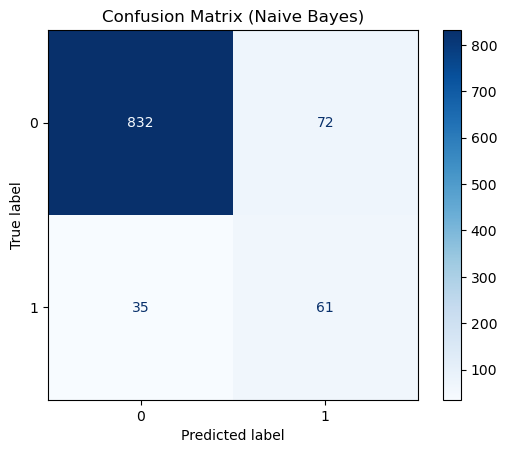

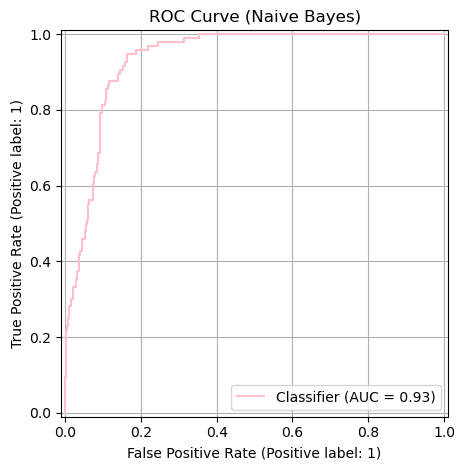

In [152]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_proba = nb.predict_proba(x_test)[:, 1]

#  Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve (Naive Bayes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# multinomial expect non negative feature
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Data preparation for MultinomialNB
x_train_mnb = (x_train_scaled * 100).astype(int)
x_test_mnb = (x_test_scaled * 100).astype(int)
# Train MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_mnb, y_train)
y_pred_mnb = mnb.predict(x_test_mnb)
y_proba_mnb = mnb.predict_proba(x_test_mnb)[:, 1]

# Data preparation for BernoulliNB (binarize)
x_train_bnb = (x_train_scaled > 0.5).astype(int)
x_test_bnb = (x_test_scaled > 0.5).astype(int)
#benouli expects binary features
# Train BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train_bnb, y_train)
y_pred_bnb = bnb.predict(x_test_bnb)
y_proba_bnb = bnb.predict_proba(x_test_bnb)[:, 1]

# Metrics
def print_metrics(name, y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    print(f"\n{name} Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC:       {auc:.4f}")

print_metrics("MultinomialNB", y_test, y_pred_mnb, y_proba_mnb)
print_metrics("BernoulliNB", y_test, y_pred_bnb, y_proba_bnb)


MultinomialNB Results:
Accuracy:  0.8150
Precision: 0.2891
Recall:    0.6354
F1 Score:  0.3974
AUC:       0.8409

BernoulliNB Results:
Accuracy:  0.9010
Precision: 0.4845
Recall:    0.4896
F1 Score:  0.4870
AUC:       0.9131


* Based on different scores it seems Naive Bayes doen not have the best performance for this sort of data

<span style="font-size:16px; color: black;font-weight: bold">Among all the models, I consider KNN to be the best.</span>

<span style="font-size:20px; color: magenta;font-weight: bold">New data</span>

In [51]:
# the new data was already given to us but the income was base on year for this data we put 30/12=2.5
new_row = pd.DataFrame([{
    'Age': 42,
    'Experience': 16,
    'Income': 2.5,
    'ZIP Code': 92037,
    'Family': 3,
    'CCAvg': 1.2,
    'Education': 3,
    'Mortgage': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1
}])


In [52]:
new_row

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,42,16,2.5,92037,3,1.2,3,0,1,0,1,1


In [53]:
# the order and name of columns in new data have to be exactly same as x_final
print(x_final.columns.tolist())

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education', 'ZIP_Code_encoded']


for knn and also for training I included ZIP-Code-encode which basically is based on personal loan, but in the new row we want to find personal loan, so although it might decrease accuracy but we drop this column from the final, but continue with the model KNN =3

In [54]:
x_final = x_final.drop(columns=['ZIP_Code_encoded'], errors='ignore')


In [55]:
x_final.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education
0,0.045455,0.023256,0.189444,1.000000,0.16,0.0,1,0,0,0,1
1,0.500000,0.441860,0.120000,0.666667,0.15,0.0,1,0,0,0,1
2,0.363636,0.348837,0.013889,0.000000,0.10,0.0,0,0,0,0,1
3,0.272727,0.209302,0.425556,0.000000,0.27,0.0,0,0,0,0,2
4,0.272727,0.186047,0.171111,1.000000,0.10,0.0,0,0,0,1,2


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, stratify=y, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
new_row = pd.DataFrame([{
    'Age': 42,
    'Experience': 16,
    'Income': 2.5,
    'Family': 3,
    'CCAvg': 1.2,
    'Mortgage': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1,
    'Education':3,
}])


In [69]:
x_final.columns.tolist()


['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Education']

In [70]:
new_row.columns.tolist()

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Education']

In [71]:
print(numeric_cols)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']


In [72]:
print(new_row[numeric_cols].shape)

(1, 6)


In [73]:
print(type(scaler))

<class 'sklearn.preprocessing._data.MinMaxScaler'>


In [74]:
print(scaler.n_features_in_)  # Should be 6 but it is 12 so we want to convert only numerical columns

6


In [75]:
scaler = MinMaxScaler()
x_numeric = pd.DataFrame(scaler.fit_transform(x[numeric_cols]), columns=numeric_cols)

In [76]:
new_row = pd.DataFrame([{
    'Age': 42,
    'Experience': 16,
    'Income': 2.5,
    'Family': 3,
    'CCAvg': 1.2,
    'Mortgage': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1,
    'Education':3,
}])

new_numeric = pd.DataFrame(scaler.transform(new_row[numeric_cols]), columns=numeric_cols)
new_binary = new_row[binary_cols].reset_index(drop=True)
new_ordinal = new_row[ordinal_cols].reset_index(drop=True)
new_row_final = pd.concat([new_numeric, new_binary, new_ordinal], axis=1)
new_row_final = new_row_final[x_final.columns] 

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred_class = knn.predict(new_row_final)[0]
pred_proba = knn.predict_proba(new_row_final)[0][1]
print(f"Predicted class: {pred_class}")
print(f"Probability of loan approval: {pred_proba:.4f}")

Predicted class: 0
Probability of loan approval: 0.0000


* For new data we recieved the personal loan is 0 based on features.

<span style="font-size:20px; color: magenta;font-weight: bold">Final Visualization</span>

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=0, stratify=y)
best_model = KNeighborsClassifier(n_neighbors=3)
best_model.fit(x_train, y_train.ravel())
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)

C:\Users\Afroo\AppData\Local\Temp\ipykernel_9492\2786820411.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  best_model.fit(x_train, y_train.ravel())


In [79]:
x_visual = df3.drop(['Personal Loan', 'Mortgage', 'Age', 'Experience', 'CreditCard', 'Online'], axis=1)
y_visual = df3['Personal Loan'].values.reshape(-1, 1)
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(x_visual, y_visual, test_size=0.2, random_state=0, stratify=y_visual)
# Actual and predicted labels
x_test_vis.insert(6, 'Personal Loan', y_test_vis)
x_test_vis.insert(7, 'Pred', y_pred_test)
x_train_vis.insert(6, 'Personal Loan', y_train_vis)
x_train_vis.insert(7, 'Pred', y_pred_train)

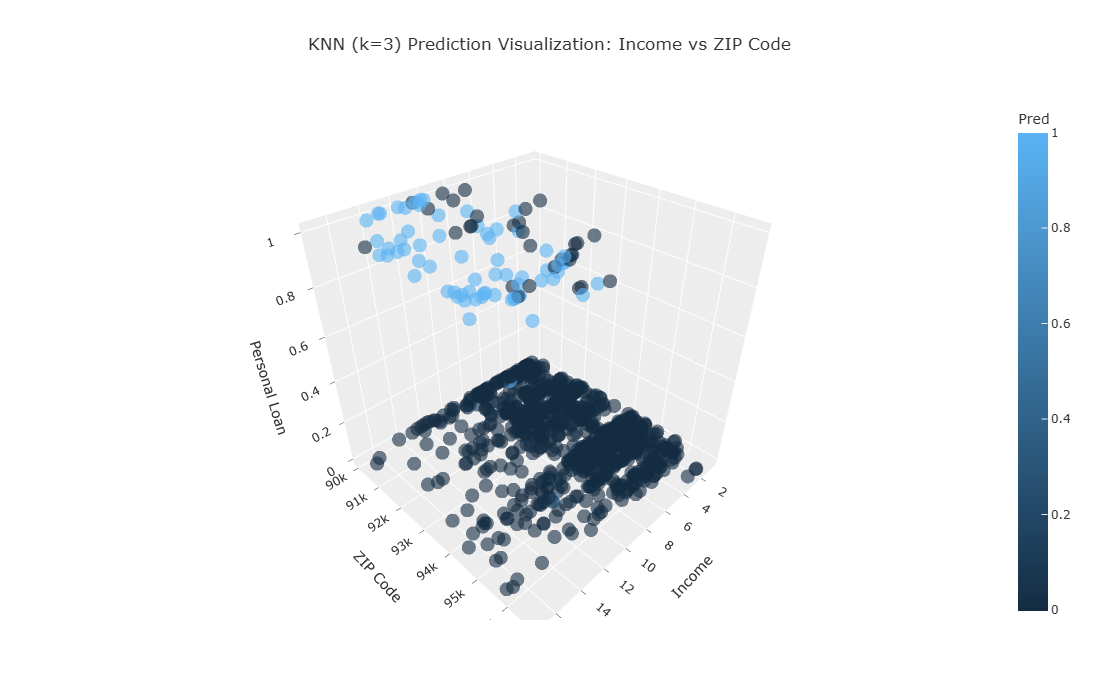

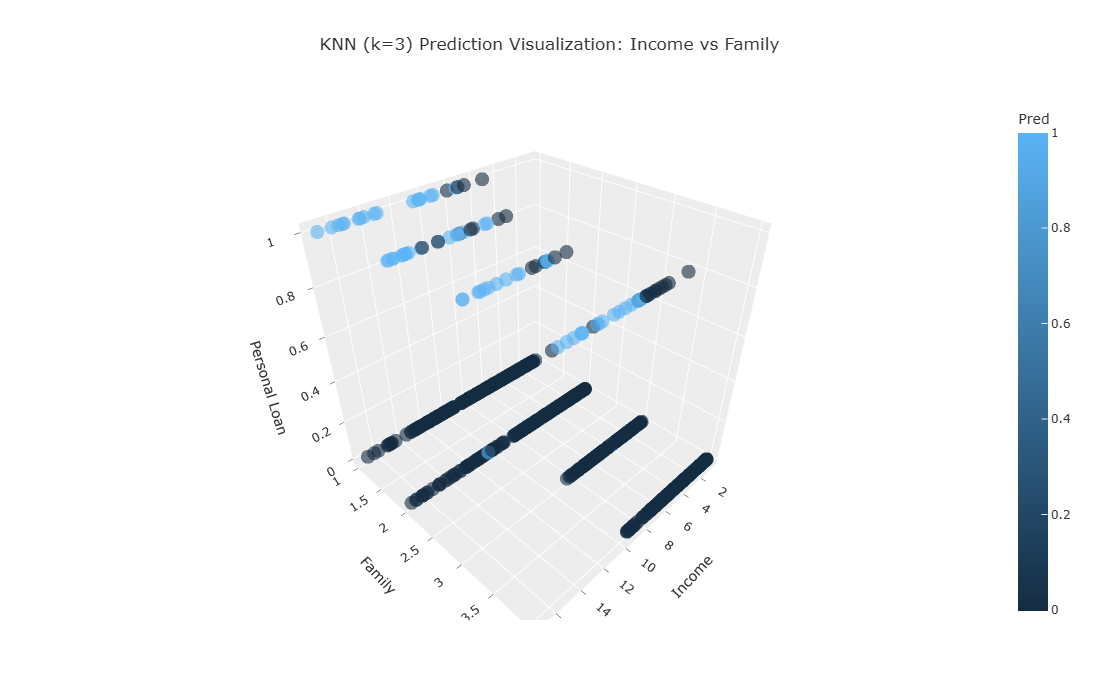

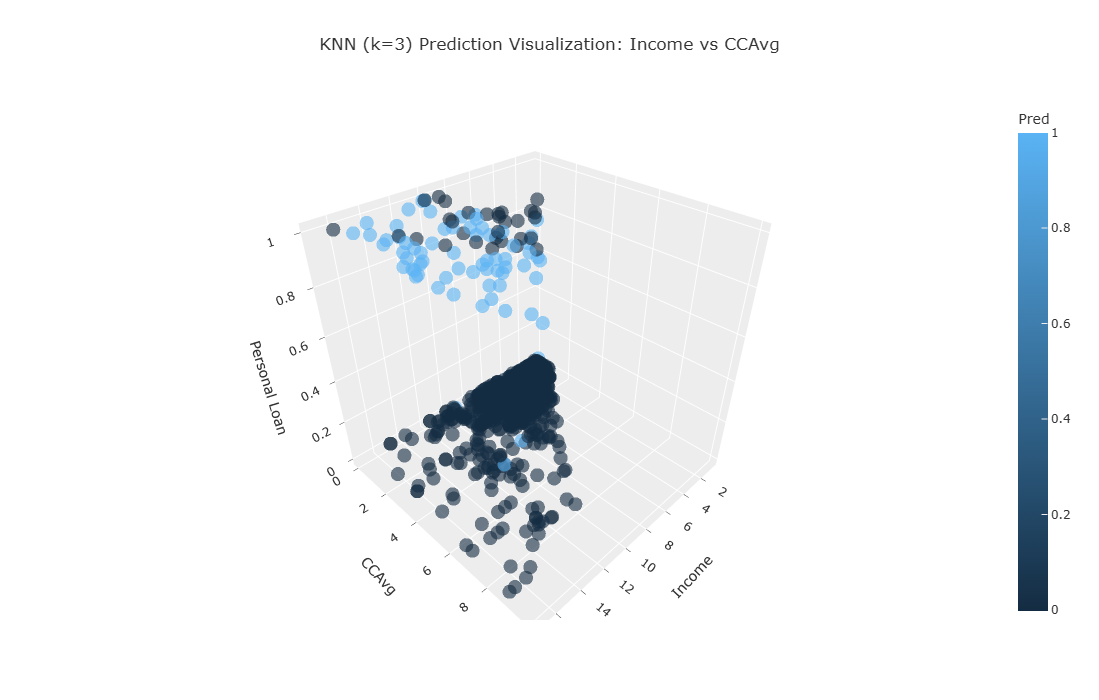

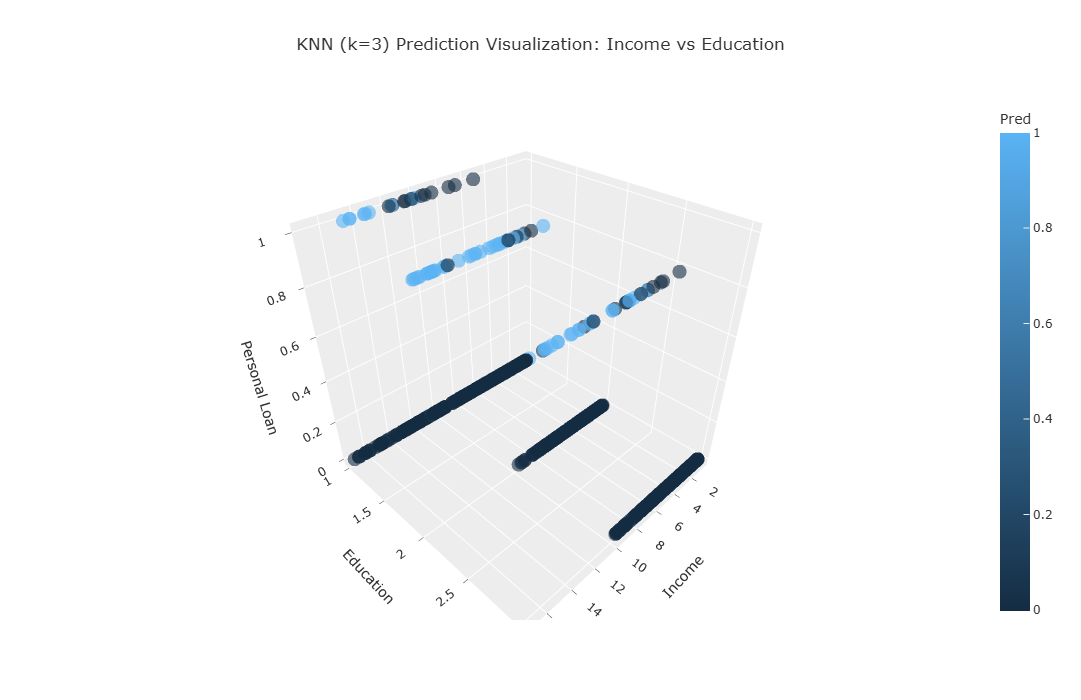

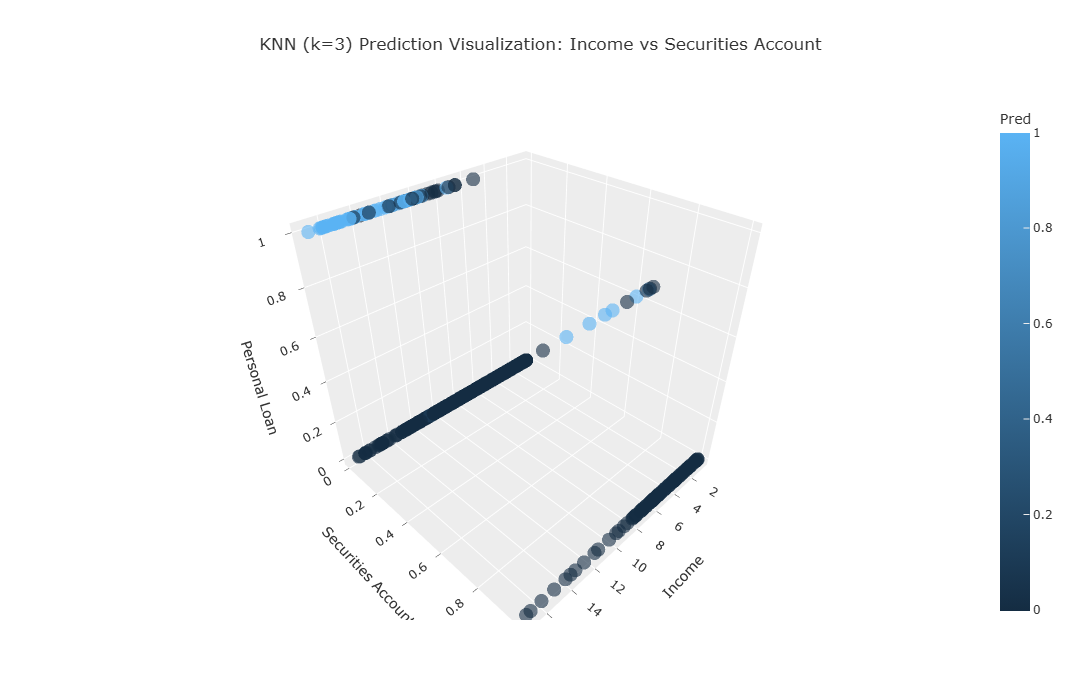

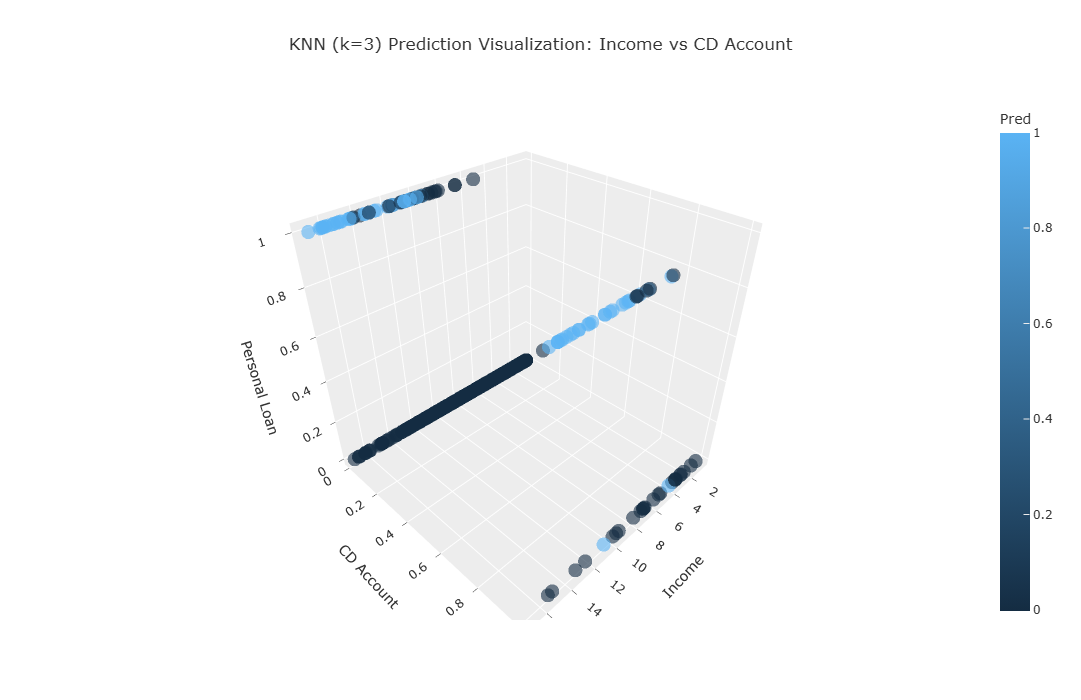

In [80]:
#features for visualization
cols = [col for col in x_test_vis.columns if col not in ['Income', 'Personal Loan', 'Pred']]
for col in cols:
    fig = px.scatter_3d(
        data_frame=x_test_vis,
        x='Income',
        y=col,
        z='Personal Loan',
        color='Pred',
        color_discrete_map={0: 'lightgray', 1: 'green'},
        template='ggplot2',
        hover_name='Education',
        opacity=0.6,
        height=700,
        title=f'KNN (k=3) Prediction Visualization: Income vs {col}'
    )
    pio.show(fig)

predicted for most of data correctly